## Artifical neural network for proving Moore's law using Tensorflow

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing





### Importing the dataset

In [1]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
dataset = pd.read_csv('moore.csv', header=None)
# X = dataset[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
# Y = dataset[:,1]

'wget' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'pd' is not defined

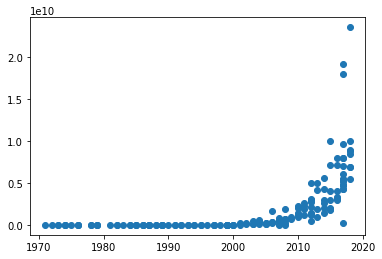

In [ ]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values
plt.scatter(X,y) #shows exponential growth

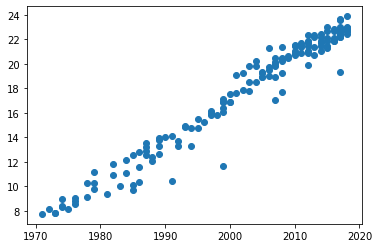

In [ ]:
y = np.log(y) #taking log to make the model linear
plt.scatter(X,y) #we get a linear model

### Feature Scaling

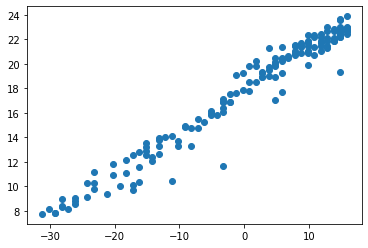

In [ ]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean() #X is the year and difference is large
plt.scatter(X,y)

## Part 2 - Building the ANN

### 1. Initializing the ANN

In [ ]:
model = tf.keras.models.Sequential()

### 2. Adding the input layer and the output layer

In [ ]:
model.add(tf.keras.layers.Dense(1,input_shape=(1,),activation=None))

## Part 3 - Training the Artificial Neural Network

### Compiling the ANN

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9), loss = 'mse')

### Training the ANN on the Training set

In [ ]:
# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
# Train the model
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 318.7029
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 356.4414
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 252.6260
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 202.3201
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 226.4757
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 187.1891
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 132.6415
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 122.8555
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 74.8735
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 88.0414
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 32.7781
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 19.0045
Epoch 13/200
6/6 [=======================

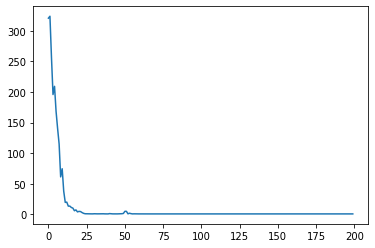

In [ ]:
# Plot what's returned by model.fit()
plt.plot(r.history['loss'], label='loss')

In [ ]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.35103118]], dtype=float32), array([17.769394], dtype=float32)]


In [ ]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.35103118


Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 1.9746028608443824


In [ ]:
# If you know the analytical solution
X = np.array(X).flatten()
y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(y) - y.mean()*X.sum() ) / denominator
b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


## Part 4 - Making the predictions and evaluating the model

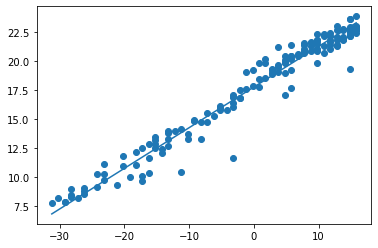

In [ ]:
# Make sure the line fits our data
ypred = model.predict(X).flatten()

plt.scatter(X, y)
plt.plot(X, ypred)

In [ ]:
#Manual calculation
#get the weights and bias
w,b = model.layers[0].get_weights()
#reshape X since we flattened it for prediction
X = X.reshape(-1,1)
# N x 1 x 1 x 1 + 1 x 1  = N x 1
ypred2 = (X.dot(w) + b).flatten()
#donot use == for floating point
np.allclose(ypred,ypred2)

True